# Tipping Module Parameterization B Calibration
---
**Author** : Amaury Laridon

**Date** : 07/11/23

---

## Algorithme I with parameterization choice B for the fresh water flux

Here, we will numerically translate Algorithm I, which corresponds to the method described in [[Note de Travail - Cadre mathématique coefficients de couplage]] and which is a generalized application of Monteiro's (2022) method. We look at the choice of parameterization "B" which corresponds to two distincts forcing for the fresh water flux on the AMOC. $F_{GIS}$ associated to the specific Greeland Ice Sheet's fresh water flux and $F_{O}$ corresponding to all the others contributions.

### Reminder of the mathematical framework


#### AMOC's calibration

We wish to calibrate the following ODE,
$$      \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T + e_{12}F_{GIS}+fF_O)\mu_\Psi(\Psi)  = h(\Psi, T, F_{GIS}, F_O) \quad (1)      $$
The mathematical framework described in [[Note de Travail - Cadre mathématique Module Tipping Cascade et Calibration Coefficients de couplage]] has given us the following results for coefficient values,

$$a_1 = \frac{3(\Psi^{-}+\Psi^{+})}{2} \quad (a) $$
$$b_1 =  -3 \Psi^{-}\Psi^+ \quad (b)$$
$$   c_1 + e_{12}F_{GIS}^A + fF_O^A  = \frac{T^+_\Psi\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-T^{-}_\Psi\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(T^{-}_\Psi-T^{+}_\Psi)} \quad (c) \quad (c) $$
$$  d_1 = -\frac{(\Psi^{+}-\Psi^{-})^3}{2(T^{+}_\Psi-T^{-}_\Psi)} \quad (d)   $$
$$     c_1+d_1T^B+fF_O^B =  \frac{F^+_{GIS}\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-F^{-}_{GIS}\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(F^{-}_{GIS}-F^{+}_{GIS})}\quad (e)  $$
$$  e_{12} =-\frac{(\Psi^{+}-\Psi^{-})^3}{2(F_{GIS}^{+}-F_{GIS}^{-})} \quad (f) $$
$$    c_1 + d_1T^C + e_{12}F_{GIS}^C = \frac{F^+_O\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-F^{-}_O\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(F^{-}_O-F^{+}_O)}  \quad (g)$$
$$  f = -\frac{(\Psi^{+}-\Psi^{-})^3}{2(F^{+}_O-F^{-}_O)} =f (\Psi^+,F^+_O, \Psi^-,F^-_O) \quad (h) $$
$$c_1 = \frac{T^+_\Psi\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-T^{-}_\Psi\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(T^{-}_\Psi-T^{+}_\Psi)}  - e_{12}F_{GIS}^A - fF_O^A \quad (i)  $$
$$c_1 = \frac{F^+_{GIS}\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-F^{-}_{GIS}\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(F^{-}_{GIS}-F^{+}_{GIS})} -d_1T^B-fF_O^B \quad (j)$$
$$ c_1 =  \frac{F^+_O\Psi^{-^{2}}(\Psi^{-}-3\Psi^+)-F^{-}_O\Psi^{+^{2}}(\Psi^{+}-3\Psi^{-})}{2(F^{-}_O-F^{+}_O)}   -d_1T^C - e_{12}F_{GIS}^C \quad (k) $$


For the **experience noted A** which represents the sensibility experiment with regard to temperature anomaly and a fixed fresh water flux for the GIS and Other components we have,

$$     \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T + e_{12}F_{GIS}^A+fF_O^A)\mu_\Psi(\Psi)  = h(\Psi, T, F_{GIS}^A, F_O^A) \quad (2)      $$

For the **experience noted B** which represents the sensibility experiment with regard to GIS's fresh water flux and a fixed temperature anomaly and a fixed $F_O$ we have,

$$     \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T^B + e_{12}F_{GIS}+fF_O^B)\mu_\Psi(\Psi)  = h(\Psi, T^B, F_{GIS}, F_O^B) \quad (3)  $$ 

For the **experience noted C** represents the sensibility experiment with regard to Other component's fresh water flux and a fixed temperature anomaly and a fixed $F_GIS$ we have,

$$        \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T^C + e_{12}F_{GIS}^C+fF_O)\mu_\Psi(\Psi)  = h(\Psi, T^C, F_{GIS}^C, F_O) \quad (4)  $$ 

### GIS's calibration 

We wish to calibrate the following ODE,

$$  \frac{dV}{dt} = (-V^3 + a_2V^2 + b_2V + c_2 + d_2  T_V + e_{21} (1-\Psi_V))\mu_V(V, T_V, \Psi_V) = g(V, T_V, \Psi_V) \quad (4)  $$

and the mathematical framework described in [[Note de Travail - Cadre mathématique Module Tipping Cascade et Calibration Coefficients de couplage]] gives the following values,

$$  a_2 = \frac{3(V^{-}+V^{+})}{2} \quad (i) $$
$$  b_2 = -3 V^{-}V^+ \quad (j) $$
$$ c_2 + e_{21}(1-\Psi^C) =  \frac{T^+_VV^{-^{2}}(V^{-}-3V^+)-T^{-}_VV^{+^{2}}(V^{+}-3V^{-})}{2(T^{-}_V-T^{+}_V)} \quad (k) $$
$$ d_2 = -\frac{(V^{+}-V^{-})^3}{2(T^{+}_V-T^{-}_V)} \quad (l) $$ 
$$ c_2 + d_2T^D =  V^+{^3} - a_2V^+{^2} -b_2V^+-e_{21}(1-\Psi_V^+) \quad (m) $$
$$ e_{21} = -\frac{(V^{+}-V^{-})^3}{2(\Psi^{-}_V-\Psi^{+}_V)} \quad (n) $$
$$ c_2 = \frac{T^+_VV^{-^{2}}(V^{-}-3V^+)-T^{-}_VV^{+^{2}}(V^{+}-3V^{-})}{2(T^{-}_V-T^{+}_V)} - e_{21}(1-\Psi^C) \quad (o) $$
$$ c_2 = ( V^+{^3} - a_2V^+{^2} -b_2V^+-e_{21}(1-\Psi_V^+))-d_2T_V^D \quad (p) $$ 

For the sensibility experiment C with regards to the temperature anomaly and a fixed AMOC's intensity we have,

$$ \frac{dV}{dt} = (-V^3 + a_2V^2 + b_2V + c_2 + e_{21}(1-\Psi^C) + d_2  T)\mu_V(V, T, \Psi) = g_{ExpC}(V, T_V, \Psi_V) \quad (5) $$

For the sensibility experiment D with regards to the AMOC's intensity and a fixed temperature anomaly we have,

$$  \frac{dV}{dt} = (-V^3 + a_2V^2 + b_2V + c_2 + d_2 T^D + e_{21} (1-\Psi))\mu_V(V, T, \Psi) = g_{ExpD}(V, T_V, \Psi_V) \quad (6)  $$ 

## Numerical implementation of the Calibration Module

First, we want to make a numerical implementation of this mathematical framework and test it by giving as input any critical values of the bifurcation coordinates. In other words, we're first going to see whether, given the data we want to reproduce, the algorithm is a good fit before, in a second phase, providing the algorithm with real experimental values as input.


##### Libraries import 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.optimize import fsolve

##### Calibration module 

The critical values of the system variable under study (AMOC or GIS) are generally denoted by $xp, xm$, corresponding to the upper and lower critical values respectively. The critical values of the forcings are noted $op, om$. 

To avoid confusion, I explicitly define a function by coefficients, although the form is the same for many coefficients and I can simply change the arguments of the common function when calling the function and assigning it to the coefficient.

In [21]:
### Definition of the functions computing the coefficient's values. 

## General functions shared by both systems (AMOC and GIS) ## 
def a(xp,xm):
    """Definition of the a_1 coefficient cfr. Eq.(a)"""
    return (3/2)*(xp+xm)
def b(xp,xm):
    """Definition of the b_1 coefficient cfr. Eq.(b)"""
    return -3*xp*xm
def d(xp,xm,op,om):
    """Definition of the d_1 coefficient cfr. Eq.(d)"""
    return -(xp-xm)**3/(2*(op-om))
def xm_today(op,om,xp) :
    """Definition of the constrain that the state of the system is equal to 1, its maximal value when the forcing is equal to zero at pre-industrial times"""
    G = (op+om+2*(op*om)**0.5)/(op-om)
    return (-2+xp*(1+G**(1/3)+G**(-1/3)))/(-1+G**(1/3)+G**(-1/3))

## Functions specific to the AMOC's system ## 
def e12(xp,xm,op,om):
    """Definition of the e_12 coefficient cfr. Eq.(f)"""
    return -(xp-xm)**3/(2*(op-om))
def f(xp,xm,op,om):
    """Definition of the f coefficient cfr. Eq.(h)"""
    return -(xp-xm)**3/(2*(op-om))
def cAMOC_A(xp,xm,op,om):
    """Definition of the c_1^A coefficient cfr. Eq.(c)"""
    return (op*xm**2*(xm-3*xp)-om*xp**2*(xp-3*xm))/(2*(om-op))
def cAMOC_B(xp,xm,op,om):
    """Definition of the c_1^B coefficient cfr. Eq.(e)"""
    return (op*xm**2*(xm-3*xp)-om*xp**2*(xp-3*xm))/(2*(om-op))
def cAMOC_C(xp,xm,op,om):
    """Definition of the c_1^C coefficient cfr. Eq.(g)"""
    return (op*xm**2*(xm-3*xp)-om*xp**2*(xp-3*xm))/(2*(om-op))
def c1_from_A(xp,xm,op1,om1, e12, FGIS_A, f, FO_A):
    """Definition of the c_1 coefficient from experience A cfr. Eq.(i)"""
    c_A = (op1*xm**2*(xm-3*xp)-om1*xp**2*(xp-3*xm))/(2*(om1-op1))
    return (c_A-(e12*FGIS_A)-(f*FO_A))
def c1_from_B(xp,xm,op2,om2, d1, TAMOC_B, f, FO_B):
    """Definition of the c_1 coefficient from experience B cfr. Eq.(j)"""
    c_B = (op2*xm**2*(xm-3*xp)-om2*xp**2*(xp-3*xm))/(2*(om2-op2))
    return c_B-(d1*TAMOC_B)-(f*FO_B)
def c1_from_C(xp,xm,op3,om3, d1, TAMOC_C, e12, FGIS_C):
    """Definition of the c_1 coefficient from experience C cfr. Eq.(k)"""
    c_C = (op3*xm**2*(xm-3*xp)-om3*xp**2*(xp-3*xm))/(2*(om3-op3))
    return c_C-(d1*TAMOC_C)-(e12*FGIS_C)

## Functions specific to the GIS's systFem ## 

def e21(xp,xm,op,om):
    """Definition of the e_21 coefficient cfr. Eq.(n)"""
    return -(xp-xm)**3/(2*(om-op))
def c2_from_C(xp,xm,op1,om1,op2,om2,Psi_C):
    """Definition of the c_2 coefficient from experience C cfr. Eq.(o)"""
    c_C = (op1*xm**2*(xm-3*xp)-om1*xp**2*(xp-3*xm))/(2*(om1-op1))
    e_21 = e21(xp,xm,op2,om2)
    return (c_C - (e_21*(1-Psi_C)))
def c2_from_D(xp,xm,op2,om2,op1,om1,TGIS_D):
    """Definition of the c_2 coefficient from experience D cfr. Eq.(p)"""
    e_21 = e21(xp,xm,op2,om2)
    a_2 = a(xp,xm)
    b_2 = b(xp,xm)
    c_D = ((xp**3) - a_2*(xp**2) - b_2*xp - e_21*(1-op2))
    d_2 = d(xp,xm,op1,om1)
    return (c_D-(d_2*TGIS_D))

### Definition of the calibration module ###

## AMOC ## 
def calib_module_AMOC_ParamB(Psip,Psim, Tp, Tm, FGISp, FGISm, FOp, FOm, FGIS_A, FO_A, TAMOC_B, FO_B, TAMOC_C, FGIS_C):
    """Calibration module for the AMOC with the parametrisation B for the fresh water flux."""
    #Psim = xm_today(Tp, Tm, Psip)
    a_1 = a(Psip, Psim)
    b_1 = b(Psip,Psim)
    d_1 = d(Psip,Psim, Tp, Tm)
    e_12 = e12(Psip, Psim, FGISp, FGISm)
    f_1 = f(Psip, Psim, FOp, FOm)
    c1_f_A = c1_from_A(Psip, Psim, Tp, Tm, e_12, FGIS_A, f_1, FO_A)
    c1_f_B = c1_from_B(Psip, Psim, FGISp, FGISm, d_1, TAMOC_B, f_1, FO_B)
    c1_f_C = c1_from_C(Psip, Psim, FOp, FOm, d_1, TAMOC_C, e_12, FGIS_C)
    return [a_1, b_1, d_1, e_12, f_1, c1_f_A, c1_f_B, c1_f_C]

## GIS ## 
def calib_module_GIS(Vp, Vm, Tp, Tm, Psip, Psim, Psi_C, TGIS_D):
    """Calibration module for the GIS"""
    Vm = xm_today(Tp, Tm, Vp)
    a_2 = a(Vp, Vm)
    b_2 = b(Vp, Vm)
    d_2 = d(Vp, Vm, Tp, Tm)
    e_21 = e21(Vp, Vm, Psip, Psim)
    c2_f_C = c2_from_C(Vp, Vm, Tp, Tm, Psip, Psim, Psi_C)
    c2_f_D = c2_from_D(Vp, Vm, Psip, Psim, Tp, Tm, TGIS_D)
    return [a_2, b_2, d_2, e_21, c2_f_C, c2_f_D]

#### Test data and coefficients calibration based on it

In [22]:
##### Sensibility Experiment parameters #####

### AMOC ###
FGIS_A = 0.8 # Constant value of the fresh water flux from the GIS for the sensibility experiment A [Sv] 
FO_A = 0.3 # Constant value of the fresh water flux from the Other components for the sensibility experiment A [Sv]
TAMOC_B = 2 # Constant value of the temperature for the sensibility experiment B [°C]
FO_B = 0.8 # Constant value of the fresh water flux from the Other components for the sensibility experiment B [Sv]
TAMOC_C = 2 # Constant value of the temperature for the sensibility experiment C [°C]
FGIS_C = 0.5 # Constant value of the fresh water flux from the GIS for the sensibility experiment C [Sv] 
crit_time_scale_sep_AMOC = 0.3 # Intensity of the AMOC at which there is a seperation of the dynamic's time scale [Adim]

### GIS ###
Psi_C = 0.9 # Constant value of the AMOC's intensity for the sensibility experiment C [Adim]
TGIS_D = 1.5 # Constant value of the temperature for the sensibility experiment D [°C]

##### Critical Bifurcation Data #####

### Data from Victor Couplet (2023) ###

couplet_values = True 
couplet_normal_case = True 
couplet_worst_case = False

if couplet_values:
    if couplet_normal_case:
        ## Couplet SURFER v3.0 "normal case" values for AMOC ##  
        Psip_AMOC = 0.77 # Higher critical value of the AMOC intensity 
        Tp_AMOC = 4 # Higher critical temperature forcing value for the AMOC 
        Tm_AMOC = 0 # Lower critical temperature forcing value for the AMOC 
        FGISp_AMOC = 0.5 # Higher critical fresh water forcing value from the GIS for the AMOC (Non defined in Couplet (2023))
        FGISm_AMOC = 0.05 # Lower critical fresh water forcing value from the GIS for the AMOC (Non defined in Couplet (2023))
        FOp_AMOC = 0.8 # Higher critical fresh water forcing value from the other components for the AMOC (Non defined in Couplet (2023))
        FOm_AMOC = 0.08 # Lower critical fresh water forcing value from the other components for the AMOC (Non defined in Couplet (2023))
        Psim_AMOC = xm_today(Tp_AMOC,Tm_AMOC,Psip_AMOC) # Lower critical value of the AMOC intensity
        taup_AMOC = 50 # Timescale associated to the AMOC when it is on its ON state
        taum_AMOC = 50 # Timescale associated to the AMOC when it is on its OFF state
        ### Couplet SURFER v3.0 "normal case" values for GIS ###
        Vp_GIS = 0.77 # Higher critical value of the GIS volume
        Tp_GIS = 1.52 # Higher critical temperature forcing value for the GIS
        Tm_GIS = 0.3 # Lower critical temperature forcing value for the GIS
        Psip_GIS = 0.7 # Higher critical AMOC's intensity value for the GIS (Non defined in Couplet (2023))
        Psim_GIS = 0.1 # Lower critical AMOC's intensity value for the GIS (Non defined in Couplet (2023))
        Vm_GIS = xm_today(Tp_GIS, Tm_GIS, Vp_GIS) # Lower critical value of the GIS volume
        taup_GIS = 2000 # Timescale associated to the GIS when it is on its ON state
        taum_GIS = 2000 # Timescale associated to the GIS when it is on its OFF state
    if couplet_worst_case:
        ## Couplet SURFER v3.0 "worst case" values for AMOC ##  
        Psip_AMOC = 0.77 
        Tp_AMOC = 1.4 
        Tm_AMOC = 0 
        FGISp_AMOC = 0.5 # Higher critical fresh water forcing value from the GIS for the AMOC (Non defined in Couplet (2023))
        FGISm_AMOC = 0.05 # Lower critical fresh water forcing value from the GIS for the AMOC (Non defined in Couplet (2023))
        FOp_AMOC = 0.8 # Higher critical fresh water forcing value from the other components for the AMOC (Non defined in Couplet (2023))
        FOm_AMOC = 0.08 # Lower critical fresh water forcing value from the other components for the AMOC (Non defined in Couplet (2023))
        Psim_AMOC = xm_today(Tp_AMOC,Tm_AMOC,Psip_AMOC) 
        taup_AMOC = 15 
        taum_AMOC = 15
        ### Couplet SURFER v3.0 "worst case" values for GIS ###
        Vp_GIS = 0.77 
        Tp_GIS = 0.8
        Tm_GIS = 0.3
        Psip_GIS = 0.7 # Non defined in Couplet (2023)
        Psim_GIS = 0.1 # Non defined in Couplet (2023)
        Vm_GIS = xm_today(Tp_GIS, Tm_GIS, Vp_GIS) 
        taup_GIS = 1000 
        taum_GIS = 1000 

AMOC_crit_params = [Psip_AMOC, Psim_AMOC, Tp_AMOC, Tm_AMOC, FGISp_AMOC, FGISm_AMOC, FOp_AMOC, FOm_AMOC, taup_AMOC, taum_AMOC] # List containing all the AMOC's critical parameters
GIS_crit_params = [Vp_GIS, Vm_GIS, Tp_GIS, Tm_GIS, Psip_GIS, Psim_GIS, taup_GIS, taum_GIS] # List containing all the GIS's critical parameters

##### Computation of the calibrated coefficient in the tipping point cascade module with respect to the critical data given #####

## Computation and assignation ## 

AMOC_Module_calib_coeff = calib_module_AMOC_ParamB(AMOC_crit_params[0], AMOC_crit_params[1], AMOC_crit_params[2], AMOC_crit_params[3], AMOC_crit_params[4], AMOC_crit_params[5], AMOC_crit_params[6], AMOC_crit_params[7], FGIS_A, FO_A, TAMOC_B, FO_B, TAMOC_C, FGIS_C) 
a_AMOC = AMOC_Module_calib_coeff[0]
b_AMOC = AMOC_Module_calib_coeff[1]
c_AMOC = AMOC_Module_calib_coeff[5]
d_AMOC = AMOC_Module_calib_coeff[2]
e_AMOC = AMOC_Module_calib_coeff[3]
f_AMOC = AMOC_Module_calib_coeff[4]

GIS_Module_calib_coeff = calib_module_GIS(GIS_crit_params[0], GIS_crit_params[1], GIS_crit_params[2], GIS_crit_params[3], GIS_crit_params[4], GIS_crit_params[5], Psi_C, TGIS_D) 
a_GIS = GIS_Module_calib_coeff[0]
b_GIS = GIS_Module_calib_coeff[1]
c_GIS = GIS_Module_calib_coeff[4]
d_GIS = GIS_Module_calib_coeff[2]
e_GIS = GIS_Module_calib_coeff[3]

## Output ##
print("-----------------------------------------------------------")
print("Calibrated coefficient for the tipping cascade module")
print("-----------------------------------------------------------")
print("----------------")
print("AMOC")
print("----------------")
print("a = {:.3f}".format(a_AMOC))
print("b = {:.3f}".format(b_AMOC))
print("c = {:.3f}".format(c_AMOC))
print("d = {:.3f}".format(d_AMOC))
print("e = {:.3f}".format(e_AMOC))
print("f = {:.3f}".format(f_AMOC))
print("c value from experience B = {:.3f}".format(AMOC_Module_calib_coeff[6]))
print("c value from experience C = {:.3f}".format(AMOC_Module_calib_coeff[7]))
print("----------------")
print("GIS")
print("----------------")
print("a = {:.3f}".format(a_GIS))
print("b = {:.3f}".format(b_GIS))
print("c = {:.3f}".format(c_GIS))
print("d = {:.3f}".format(d_GIS))
print("e = {:.3f}".format(e_GIS))
print("c value from experience D = {:.3f}".format(GIS_Module_calib_coeff[5]))
print("-----------------------------------------------------------")

-----------------------------------------------------------
Calibrated coefficient for the tipping cascade module
-----------------------------------------------------------
----------------
AMOC
----------------
a = 1.620
b = -0.716
c = 0.203
d = -0.012
e = -0.108
f = -0.068
c value from experience B = 0.180
c value from experience C = 0.180
----------------
GIS
----------------
a = 1.684
b = -0.815
c = 0.125
d = -0.030
e = 0.061
c value from experience D = 0.112
-----------------------------------------------------------


#### Definition of the ODE model

In [23]:
##### Definition of the ODE's #####

### AMOC ###

def dPsi_dt(Psi, T_forcing, FGIS_forcing, FO_forcing, model_parameters):
    """Definition of the Eq.(1)"""

    AMOC_Module_calib_coeff = calib_module_AMOC_ParamB(AMOC_crit_params[0], AMOC_crit_params[1], AMOC_crit_params[2], AMOC_crit_params[3], AMOC_crit_params[4], AMOC_crit_params[5], AMOC_crit_params[6], AMOC_crit_params[7], FGIS_A, FO_A, TAMOC_B, FO_B, TAMOC_C, FGIS_C) 
    
    a_AMOC = AMOC_Module_calib_coeff[0]
    b_AMOC = AMOC_Module_calib_coeff[1]
    c_AMOC = AMOC_Module_calib_coeff[5]
    d_AMOC = AMOC_Module_calib_coeff[2]
    e_AMOC = AMOC_Module_calib_coeff[3]
    f_AMOC = AMOC_Module_calib_coeff[4]
    
    def mu_psi(Psi):
        if crit_time_scale_sep_AMOC<Psi:
            return 1/model_parameters[8]
        else:
            return 1/model_parameters[9]

    return mu_psi(Psi)*(-Psi**3 + a_AMOC*Psi**2 + b_AMOC*Psi + c_AMOC + d_AMOC*T_forcing + e_AMOC*FGIS_forcing + f_AMOC*FO_forcing)

### GIS ### 

def dV_dt(V, T_forcing, Psi_forcing, model_parameters):
    """Definition of the Eq.(4)"""

    GIS_Module_calib_coeff = calib_module_GIS(model_parameters[0], model_parameters[1], model_parameters[2], model_parameters[3], model_parameters[4], model_parameters[5], Psi_forcing, T_forcing)

    a_GIS = GIS_Module_calib_coeff[0]
    b_GIS = GIS_Module_calib_coeff[1]
    c_GIS = GIS_Module_calib_coeff[4]
    d_GIS = GIS_Module_calib_coeff[2]
    e_GIS = GIS_Module_calib_coeff[3]

    def H_V(V, T_forcing, Psi_forcing):
        return (-V**3+a_GIS*V**2+b_GIS*V+c_GIS+d_GIS*T_forcing+e_GIS*(1-Psi_forcing))

    def mu_V(V, T_forcing, Psi_forcing):
        h_V = H_V(V, T_forcing, Psi_forcing)
        if h_V>0:
            return 1/model_parameters[6]
        else: 
            if V < 10**(-4):
                return 0.0
            else:
                return 1/model_parameters[7]
    
    return mu_V(V, T_forcing, Psi_forcing)*(-V**3+a_GIS*V**2+b_GIS*V+c_GIS+d_GIS*T_forcing+e_GIS*(1-Psi_forcing))


## Results Analysis

### Phase Portrait - AMOC

Phase portrait of the $\frac{d\Psi}{dt} = f(\Psi)$ function, Eq.(1) and computation of the equilibrium points

[]

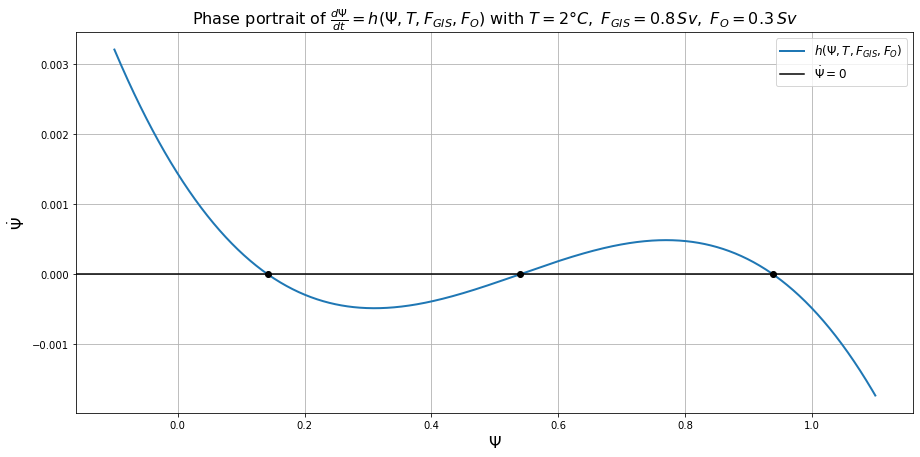

In [24]:
### Computation of the equilibirum points of equation (1) ###

eq_points_1 = fsolve(dPsi_dt, -0.5, args=(TAMOC_B, FGIS_A, FO_A, AMOC_crit_params))
eq_points_2 = fsolve(dPsi_dt, 0.5, args=(TAMOC_B, FGIS_A, FO_A, AMOC_crit_params))
eq_points_3 = fsolve(dPsi_dt, 1.25, args=(TAMOC_B, FGIS_A, FO_A, AMOC_crit_params))

eq_points = [eq_points_1, eq_points_2, eq_points_3]

### Plot of the phase portrait Eq.(1) with equilibrium points ###
N = 1000
Psi = np.linspace(-0.1, 1.1, N)
Y = np.zeros(N)
for i in range(N):
    y = dPsi_dt(Psi[i], T_forcing=TAMOC_B, FGIS_forcing=FGIS_A, FO_forcing=FO_A, model_parameters=AMOC_crit_params)
    Y[i] = y
    
fig, ax = plt.subplots(1,1,figsize=(15,7))

ax.plot(Psi, Y, label = r"$h(\Psi, T, F_{GIS}, F_O)$", lw=2)
plt.axhline(y=0, color="black", label="$\dot{\Psi}=0$")
for i in range(3):
    plt.plot(eq_points[i], dPsi_dt(eq_points[i], T_forcing=TAMOC_B, FGIS_forcing=FGIS_A, FO_forcing=FO_A, model_parameters=AMOC_crit_params), "ko")
ax.set_xlabel(r"$\Psi$", fontsize = 16)
ax.set_ylabel(r"$\dot{\Psi}$", fontsize = 16)
ax.set_title("Phase portrait of "+r"$\frac{d\Psi}{dt} = h(\Psi, T, F_{GIS}, F_{O})$" + " with " + r"$T={}°C,$".format(TAMOC_B) + r" $F_{GIS}$" + r"$={}\,Sv,$".format(FGIS_A) + r" $F_{O}$" + r"$={}\,Sv$".format(FO_A), fontsize = 16)
ax.legend(fontsize = 12)
plt.grid()
plt.plot()

### Phase Portrait - GIS

Phase portrait of the $\frac{dV}{dt} = g(V)$ function, Eq.(4) and computation of the equilibrium points

[]

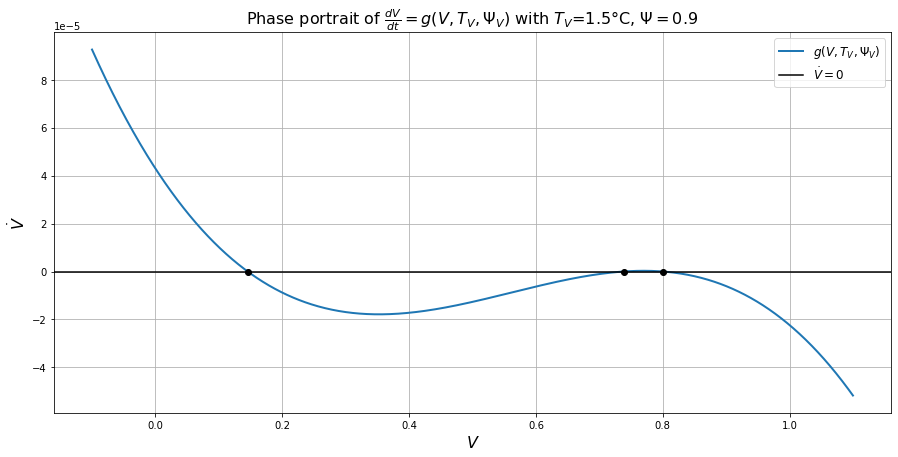

In [25]:
### Computation of the equilibirum points of equation (1) ###

eq_points_1 = fsolve(dV_dt, 0.2, args=(TGIS_D, Psi_C, GIS_crit_params))
eq_points_2 = fsolve(dV_dt, 0.5, args=(TGIS_D, Psi_C, GIS_crit_params))
eq_points_3 = fsolve(dV_dt, 1.25, args=(TGIS_D, Psi_C, GIS_crit_params))

eq_points = [eq_points_1, eq_points_2, eq_points_3]

### Plot of the phase portrait Eq.(1) with equilibrium points ###
N = 1000
V = np.linspace(-0.1, 1.1, N)
Y = np.zeros(N)
#Z = np.zeros(N)
for i in range(N):
    y = dV_dt(V[i], TGIS_D, Psi_C, GIS_crit_params)
    Y[i] = y

fig, ax = plt.subplots(1,1,figsize=(15,7))

ax.plot(V, Y, label = r"$g(V, T_V, \Psi_V)$", lw=2)
plt.axhline(y=0, color="black", label="$\dot{V}=0$")
for i in range(3):
    plt.plot(eq_points[i], dV_dt(eq_points[i], TGIS_D, Psi_C, GIS_crit_params), "ko")
ax.set_xlabel(r"$V$", fontsize = 16)
ax.set_ylabel(r"$\dot{V}$", fontsize = 16)
ax.set_title("Phase portrait of "+r"$\frac{dV}{dt} = g(V, T_V, \Psi_V)$"+" with "+r"$T_V$={}°C,".format(TGIS_D)+r" $\Psi={}$".format(Psi_C), fontsize = 16)
ax.legend(fontsize = 12)
plt.grid()
plt.plot()

### Bifurcation Diagram

#### AMOC - Bifurcation Diagram

In order to find the bifurcation diagram we will try two differents methods cfr [[Note de Travail - Cadre Algorithmique Coefficients de Couplage]].

The **first method** is to isolate the expression of the forcing consider with respect to the value of the dynamic variable $\Psi$ at equilibrium noted $\psi$. 

For the **sensitivity experiment A** this relation is equal to
$$ T = (\psi^3-a_1\psi^2-b_1\psi-c_1-e_{12}F_{GIS}^A-fF_O^A)\frac{1}{d_1} = T(\psi)\quad (8) $$ 

The idea is to plot this relation and then invert it in order to have the $(T,\psi(T))$ graph which is our bifurcation diagram.

For the **sensitivity experiment B** this relation is equal to

$$ F_{GIS} = (\psi^3-a_1\psi^2-b_1\psi-c_1-d_1T^B-fF_O^B)\frac{1}{e_{12}} = F_{GIS}(\psi) \quad (9) $$ 

For the **sensitivity experiment C** this relation is equal to

$$ F_O = (\psi^3-a_1\psi^2-b_1\psi-c_1-d_1T^C-e_{12}F_{GIS}^C)\frac{1}{f} = F_O(\psi) \quad (10) $$ 

The **second method** is to define a more general algorithm for finding explicitly the roots of Eq.(1) by iterating the fsolve() function of scipy with different initial conditions in order to get all the roots since we can have up to three roots, three equilibria for the same value of the forcing. This should not be hard to do but since the first method is easier to implement and gives good results I will not take the research further for the moment for the second method.



In [26]:
# Definition of the function folowing Eq.(8-10) # 
def T_funct_psi(psi):
  return ((psi**3 - a_AMOC*(psi**2) - b_AMOC*psi - c_AMOC - e_AMOC*FGIS_A- f_AMOC*FO_A)*(1/d_AMOC))

def FGIS_funct_psi(psi):
  return ((psi**3 - a_AMOC*(psi**2) - b_AMOC*psi - c_AMOC - d_AMOC*TAMOC_B - f_AMOC*FO_B)*(1/e_AMOC))

def FO_funct_psi(psi):
  return ((psi**3 - a_AMOC*(psi**2) - b_AMOC*psi - c_AMOC - d_AMOC*TAMOC_C - e_AMOC*FGIS_C)*(1/f_AMOC))

# Computation of the functions # 
dx=0.01
psi_range = np.arange(-0.2,1.2,dx)
T_fct_psi = T_funct_psi(psi_range)
FGIS_fct_psi = FGIS_funct_psi(psi_range)
FO_fct_psi = FO_funct_psi(psi_range)

# Classification of the unstable branche # 

unstable_psi = np.arange(AMOC_crit_params[1], AMOC_crit_params[0], dx)
T_fct_psi_unstable = T_funct_psi(unstable_psi)
FGIS_fct_psi_unstable = FGIS_funct_psi(unstable_psi)
FO_fct_psi_unstable = FO_funct_psi(unstable_psi)

Plot of the $(\delta T, \Psi(\delta T))$ graph - Bifurcation diagram of $\delta T$

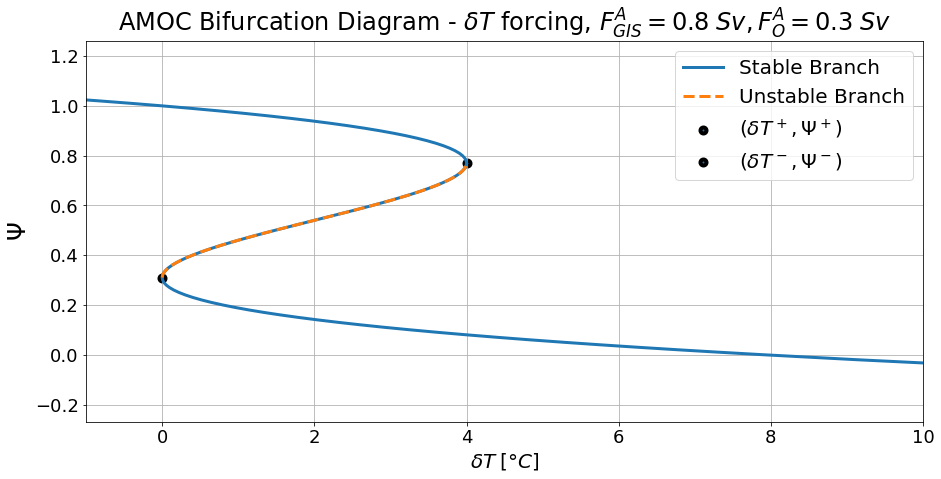

In [27]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(T_fct_psi, psi_range, label="Stable Branch", lw=3)
plt.plot(T_fct_psi_unstable, unstable_psi, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(AMOC_crit_params[2],AMOC_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\delta T^+, \Psi^+)$")
plt.scatter(AMOC_crit_params[3],AMOC_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\delta T^-, \Psi^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$\delta T\;[°C]$", fontsize=20)
ax.set_ylabel(r"$\Psi$", fontsize=24)
ax.set_xbound([-1,10])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"AMOC Bifurcation Diagram - $\delta T$ forcing, $F_{GIS}^A$" + r"$= {} \;Sv, $".format(FGIS_A) + r"$F_O^A = {} \; Sv$".format(FO_A), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/AMOC_T_BD_FGISA={}_FOA={}.png".format(FGIS_A, FO_A))

Plot of the $(F_{GIS}, \psi(F_{GIS}))$ graph - Bifurcation diagram of $F_{GIS}$

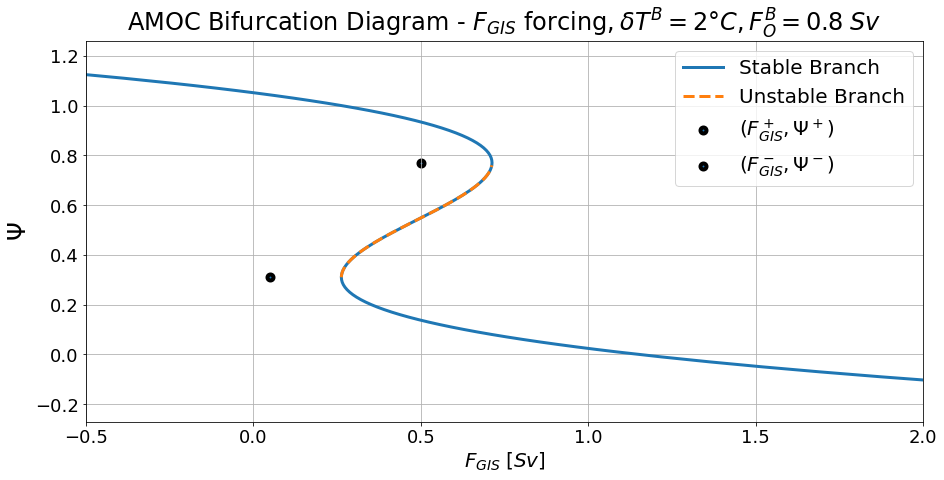

In [28]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(FGIS_fct_psi, psi_range, label="Stable Branch", lw=3)
plt.plot(FGIS_fct_psi_unstable, unstable_psi, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(AMOC_crit_params[4],AMOC_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(F_{GIS}^+, \Psi^+)$")
plt.scatter(AMOC_crit_params[5],AMOC_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(F_{GIS}^-, \Psi^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$F_{GIS}\;[Sv]$", fontsize=20)
ax.set_ylabel(r"$\Psi$", fontsize=24)
ax.set_xbound([-0.5,2])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"AMOC Bifurcation Diagram - $F_{GIS}$ forcing,"+r"$ \:\delta T^B = {}°C, $".format(TAMOC_B) + r"$F_{O}^B =$" + r"${}\; Sv$".format(FO_B), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/AMOC_FGIS_BD_TB={}_FOB={}.png".format(TAMOC_B, FO_B))


Plot of the $(F_{O}, \psi(F_{O}))$ graph - Bifurcation diagram of $F_{O}$

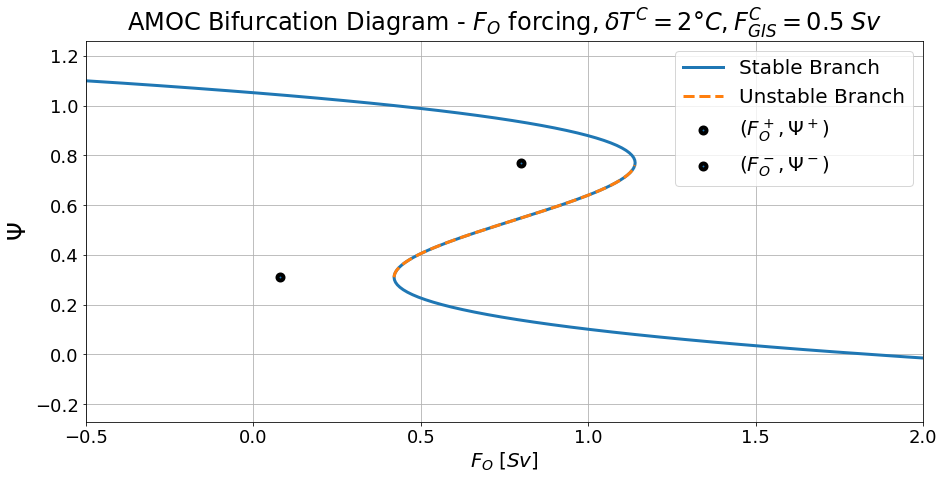

In [29]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(FO_fct_psi, psi_range, label="Stable Branch", lw=3)
plt.plot(FO_fct_psi_unstable, unstable_psi, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(AMOC_crit_params[6],AMOC_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(F_{O}^+, \Psi^+)$")
plt.scatter(AMOC_crit_params[7],AMOC_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(F_{O}^-, \Psi^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$F_{O}\;[Sv]$", fontsize=20)
ax.set_ylabel(r"$\Psi$", fontsize=24)
ax.set_xbound([-0.5,2])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"AMOC Bifurcation Diagram - $F_{O}$ forcing,"+r"$ \:\delta T^C = {}°C, $".format(TAMOC_C) + r"$F_{GIS}^C =$" + r"${}\; Sv$".format(FGIS_C), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/AMOC_FO_BD_TC={}_FGISC={}.png".format(TAMOC_C, FGIS_C))


#### GIS - Bifurcation Diagram

Following the **first method** for finding the roots described above we wish to isolate the expression of the forcing parameter with respect to the value of the dynamic variable $V$ at equilibrium noted $v$. For the sensitivity experiment C this relation is equal to

$$ T_V = (v^3-a_2v^2-b_2v-c_2-e_{21}(1-\Psi^C))\frac{1}{d_2} = T_V(v)\quad (9)  $$ 

Again we will plot this relation and then invert it to have the $(T_V,v(T_V))$ graph which is our bifurcation diagram.

In [30]:
# Definition of the function folowing Eq.(9) and Eq.(10) # 
def Tv_funct_v(v):
    return ((v**3 - a_GIS*(v**2) - b_GIS*v - c_GIS - e_GIS*(1-Psi_C))*(1/d_GIS))
def Psi_funct_v(v):
    return (1 - (v**3 - a_GIS*(v**2) - b_GIS*v - c_GIS - d_GIS*TGIS_D)*(1/e_GIS))

# Computation of the functions # 
dx=0.01
v_range = np.arange(0,1.2,dx)
Tv_fct_v = Tv_funct_v(v_range)
Psi_fct_v = Psi_funct_v(v_range)

# Classification of the unstable branche # 

unstable_v = np.arange(GIS_crit_params[1], GIS_crit_params[0], dx)
Tv_fct_v_unstable = Tv_funct_v(unstable_v)
Psi_fct_v_unstable = Psi_funct_v(unstable_v)

Plot of the $(v, T_V(v))$ graph - Bifurcation diagram of $\delta T_V$

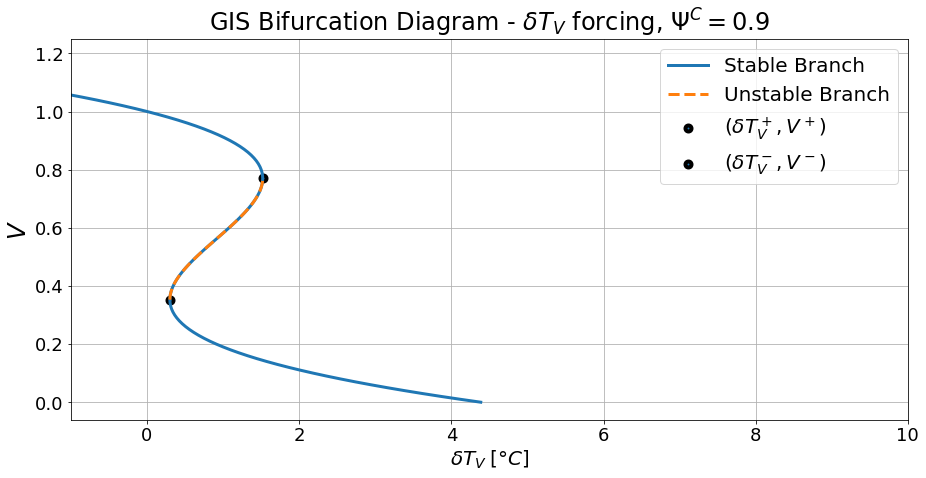

In [31]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(Tv_fct_v, v_range, label="Stable Branch", lw=3)
plt.plot(Tv_fct_v_unstable, unstable_v, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(GIS_crit_params[2],GIS_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\delta T_V^+, V^+)$")
plt.scatter(GIS_crit_params[3],GIS_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\delta T_V^-, V^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$\delta T_V\;[°C]$", fontsize=20)
ax.set_ylabel(r"$V$", fontsize=24)
ax.set_xbound([-1,10])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"GIS Bifurcation Diagram - $\delta T_V$ forcing, $\Psi^C = {} $".format(Psi_C), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/GIS_T_BD_PsiC={}.png".format(Psi_C))

Plot of the $(\Psi_V, V(\Psi_V))$ graph - Bifurcation diagram of $\Psi_V$

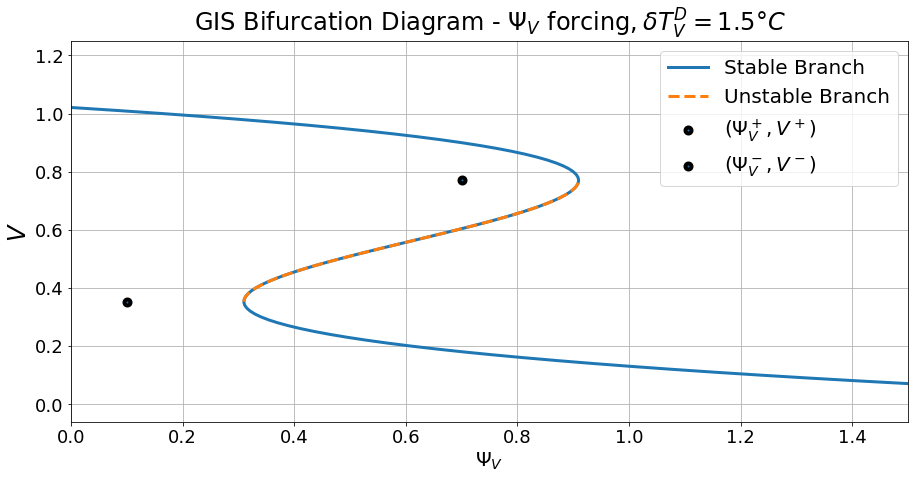

In [32]:
### Plotting ###

fig, ax = plt.subplots(1,1,figsize=(15,7))

## Plot of the bifurcation diagram ##
plt.plot(Psi_fct_v, v_range, label="Stable Branch", lw=3)
plt.plot(Psi_fct_v_unstable, unstable_v, color="tab:orange", label="Unstable Branch", lw=3, linestyle="dashed")

## Plot of the critical points ##
plt.scatter(GIS_crit_params[4],GIS_crit_params[0], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\Psi_V^+, V^+)$")
plt.scatter(GIS_crit_params[5],GIS_crit_params[1], marker='o', color="#1f77b4", linewidths=4, edgecolors="black", label=r"$(\Psi_V^-, V^-)$")

## Plot cosmetics ##
ax.set_xlabel(r"$\Psi_V$", fontsize=20)
ax.set_ylabel(r"$V$", fontsize=24)
ax.set_xbound([0,1.5])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r"GIS Bifurcation Diagram - $\Psi_V$ forcing,"+r"$ \:\delta T_V^D = {}°C$".format(TGIS_D), fontsize = 24)
plt.legend(fontsize=20)
plt.grid()

plt.show()

fig.savefig(r"/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/AMOC-GIS Tipping Module/Tipping Module Calibration - Param B/Figures/Bifurcation Diagram/GIS_Psi_BD_TD={}.png".format(TGIS_D))